# KDD Cup 1999 
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

# Feature list

# Table 1: Basic features of individual TCP connections.
|feature name | description | type |
|-------------|-------------|------|
|duration |length (number of seconds) of the connection | continuous |
|protocol_type |type of the protocol, e.g. tcp, udp, etc. | discrete |
|service | network service on the destination, e.g., http, telnet, etc. | discrete |
|src_bytes | number of data bytes from source to destination | continuous |
|dst_bytes | number of data bytes from destination to source | continuous |
|flag | normal or error status of the connection | discrete |
|land | 1 if connection is from/to the same host/port; 0 otherwise | discrete |
|wrong_fragment | number of ''wrong'' fragments | continuous |
|urgent | number of urgent packets | continuous |

# Table 2: Content features within a connection suggested by domain knowledge.
| feature name	| description | type |
|---------------|-------------|------|
| hot | number of ''hot'' indicators | continuous |
| num_failed_logins | number of failed login attempts | continuous |
| logged_in | 1 if successfully logged in; 0 otherwise | discrete |
| num_compromised | number of ''compromised'' conditions | continuous |
| root_shell | 1 if root shell is obtained; 0 otherwise | discrete |
| su_attempted | 1 if ''su root'' command attempted; 0 otherwise | discrete |
| num_root | number of ''root'' accesses | continuous |
| num_file_creations | number of file creation operations | continuous |
| num_shells | number of shell prompts | continuous |
| num_access_files | number of operations on access control files | continuous |
| num_outbound_cmds	| number of outbound commands in an ftp session | continuous |
| is_hot_login | 1 if the login belongs to the ''hot'' list; 0 otherwise | discrete |
| is_guest_login | 1 if the login is a ''guest''login; 0 otherwise | discrete |

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import utils

In [2]:
data_10_percent = 'kddcup.data_10_percent'
data_full = 'kddcup.data'
data = pd.read_csv(data_10_percent, names=utils.names)

# Remove Traffic features computed using a two-second time window
data.drop(utils.traffic_features, inplace=True, axis=1)

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.


In [4]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.0,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,0.010551,0.007793,2.012718,0.096416,0.011020,0.036482,0.0,0.0,0.037211
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000


# Categorical features to numeric labels

In [5]:
from sklearn import preprocessing

le_dicts = {}

for categorical_name in utils.categorical_names:
    le = preprocessing.LabelEncoder()
    le.fit(data[categorical_name])
    le_dicts[categorical_name] = dict(zip(le.transform(le.classes_), le.classes_))
    print(categorical_name, ':', le_dicts[categorical_name])
    data[categorical_name + '_num'] = le.fit_transform(data[categorical_name])

protocol_type : {0: 'icmp', 1: 'tcp', 2: 'udp'}
service : {0: 'IRC', 1: 'X11', 2: 'Z39_50', 3: 'auth', 4: 'bgp', 5: 'courier', 6: 'csnet_ns', 7: 'ctf', 8: 'daytime', 9: 'discard', 10: 'domain', 11: 'domain_u', 12: 'echo', 13: 'eco_i', 14: 'ecr_i', 15: 'efs', 16: 'exec', 17: 'finger', 18: 'ftp', 19: 'ftp_data', 20: 'gopher', 21: 'hostnames', 22: 'http', 23: 'http_443', 24: 'imap4', 25: 'iso_tsap', 26: 'klogin', 27: 'kshell', 28: 'ldap', 29: 'link', 30: 'login', 31: 'mtp', 32: 'name', 33: 'netbios_dgm', 34: 'netbios_ns', 35: 'netbios_ssn', 36: 'netstat', 37: 'nnsp', 38: 'nntp', 39: 'ntp_u', 40: 'other', 41: 'pm_dump', 42: 'pop_2', 43: 'pop_3', 44: 'printer', 45: 'private', 46: 'red_i', 47: 'remote_job', 48: 'rje', 49: 'shell', 50: 'smtp', 51: 'sql_net', 52: 'ssh', 53: 'sunrpc', 54: 'supdup', 55: 'systat', 56: 'telnet', 57: 'tftp_u', 58: 'tim_i', 59: 'time', 60: 'urh_i', 61: 'urp_i', 62: 'uucp', 63: 'uucp_path', 64: 'vmnet', 65: 'whois'}
flag : {0: 'OTH', 1: 'REJ', 2: 'RSTO', 3: 'RSTOS0',

In [6]:
le.transform(le.classes_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# Discrete feature analysis

In [7]:
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

# data normal = 0, attack = 1

In [8]:
data['label_binary'] = data.label.apply(lambda label: 0 if label == 'normal.' else 1)
data['label_binary'].value_counts()

1    396743
0     97278
Name: label_binary, dtype: int64

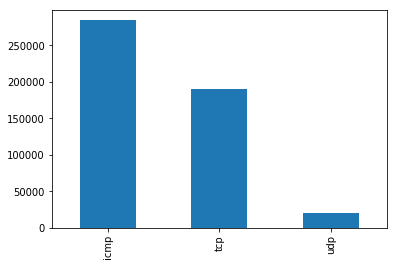

In [9]:
#all data
pd.value_counts(data['protocol_type'], sort=True).plot.bar()

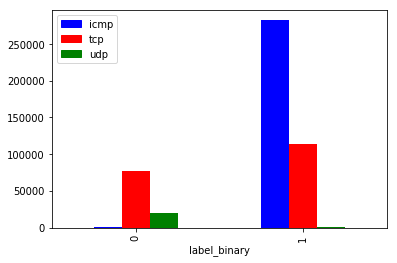

In [10]:
#all data according to label_binary
pd.pivot_table(data[['protocol_type_num', 'label_binary']].assign(count=1),
               index=['label_binary'],
               columns=['protocol_type_num'],
               aggfunc='count').plot(kind='bar', color=utils.my_colors)

handles = [mpatches.Patch(label=le_dicts['protocol_type'][i],
                          color=utils.my_colors[i]) for i in sorted(le_dicts['protocol_type'])]
plt.legend(handles=handles, loc=2)
plt.show()

In [11]:
data['service'].value_counts()[:10]

ecr_i       281400
private     110893
http         64293
smtp          9723
other         7237
domain_u      5863
ftp_data      4721
eco_i         1642
ftp            798
finger         670
Name: service, dtype: int64

In [12]:
data['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

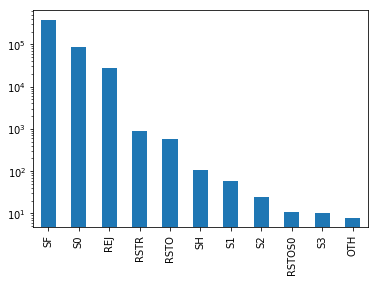

In [13]:
pd.value_counts(data['flag'], sort=True).plot(kind='bar', logy=True)

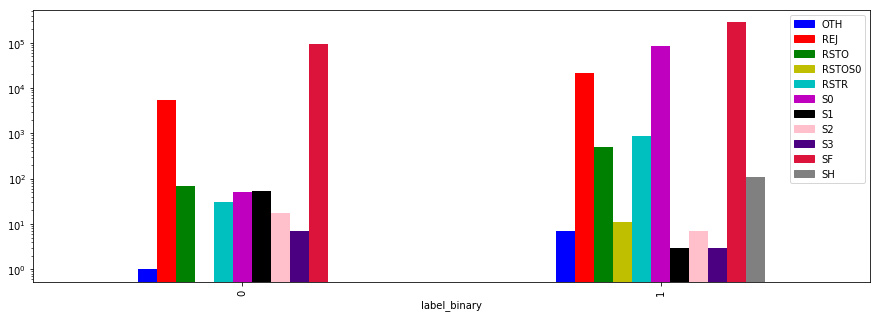

In [14]:
#flag according to label_binary
pd.pivot_table(data[['flag_num', 'label_binary']].assign(count=1),
               index=['label_binary'],
               columns=['flag_num'],
               aggfunc='count').plot(kind='bar', color=utils.my_colors, logy=True, legend=False, figsize=(15, 5))

handles = [mpatches.Patch(label=le_dicts['flag'][i],
                          color=utils.my_colors[i]) for i in sorted(le_dicts['flag'])]
plt.legend(handles=handles)
plt.show()

In [15]:
pd.pivot_table(data[['flag_num', 'label_binary']].assign(count=1),
               index=['label_binary'],
               columns=['flag_num'],
               aggfunc='count')

count                                                         \
flag_num        0        1      2     3      4        5     6     7    8    
label_binary                                                                
0              1.0   5341.0   67.0   NaN   31.0     51.0  54.0  17.0  7.0   
1              7.0  21534.0  512.0  11.0  872.0  86956.0   3.0   7.0  3.0   

                               
flag_num            9      10  
label_binary                   
0              91709.0    NaN  
1             286731.0  107.0

# Correlation

In [16]:
#Corr matrix
data[['protocol_type_num']].corrwith(data.label_binary)

protocol_type_num   -0.616601
dtype: float64

In [17]:
data.shape

(494021, 27)